# Exercise 1.1

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [20]:
df = pd.read_csv("runtimes.csv", comment='#')
df.head()

,algo,size,time1,time2,time3,time4,time5
0,distributed,4096,3.736606,2.133074,1.673441,1.515788,1.475265
1,distributed,16384,14.792794,7.894031,5.681171,4.597697,3.988286
2,distributed,65536,59.123347,30.762486,21.436608,16.510129,13.637740
3,distributed,262144,240.747448,124.448679,85.384094,64.732369,53.544233
4,distributed,1048576,1097.788352,567.038172,383.563617,290.182877,242.494498


In [23]:
# melt time
df_tidy = pd.melt(df, id_vars=["algo", "size"], var_name="threads", value_name="runtime")
df_tidy["threads"] = df_tidy["threads"].str.replace("time", "").astype(int)
print(df_tidy.dtypes)
df_tidy.head()

algo        object
size         int64
threads      int64
runtime    float64
dtype: object


,algo,size,threads,runtime
0,distributed,4096,1,3.736606
1,distributed,16384,1,14.792794
2,distributed,65536,1,59.123347
3,distributed,262144,1,240.747448
4,distributed,1048576,1,1097.788352


# Exercise 1.2

In [31]:
mpg_df = pd.read_csv("mpg-data.csv")

In [32]:
mpg_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


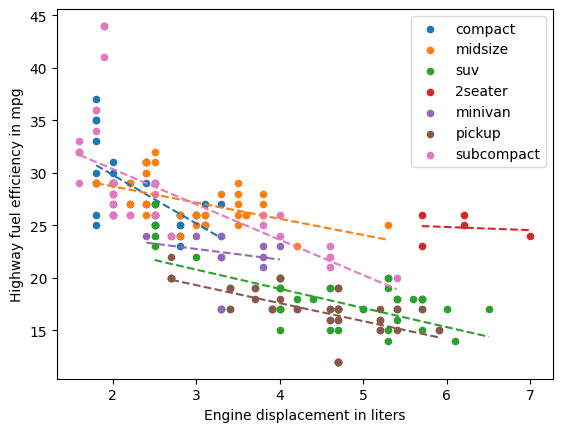

In [36]:
from sklearn.linear_model import LinearRegression

# iterate over different classes and fit linear regression

for car_class in mpg_df["class"].unique():
    class_data = mpg_df[mpg_df["class"] == car_class]
    X = class_data[["displ"]].values
    Y = class_data["hwy"].values
    model = LinearRegression()
    model.fit(X, Y)

    # Scatter Plot
    plt.scatter(X, Y, label = car_class, s = 20)

    # Plot linear regression on the range of X with the same colors
    Xrange = [[X.min()],[X.max()]]
    plt.plot(Xrange, model.predict(Xrange), linestyle="--")

# Plot Labels and legend
plt.legend()
plt.xlabel("Engine displacement in liters")
plt.ylabel("Highway fuel efficiency in mpg")
plt.show()

In [41]:
median_hwy_by_class_year = mpg_df.groupby(["class", "year"])["hwy"].median().reset_index()
print(median_hwy_by_class_year)

         class  year   hwy
0      2seater  1999  24.5
1      2seater  2008  25.0
2      compact  1999  26.0
3      compact  2008  29.0
4      midsize  1999  26.0
5      midsize  2008  28.0
6      minivan  1999  22.0
7      minivan  2008  23.0
8       pickup  1999  17.0
9       pickup  2008  17.0
10  subcompact  1999  26.0
11  subcompact  2008  26.5
12         suv  1999  17.0
13         suv  2008  18.0


# Exercise 1.3

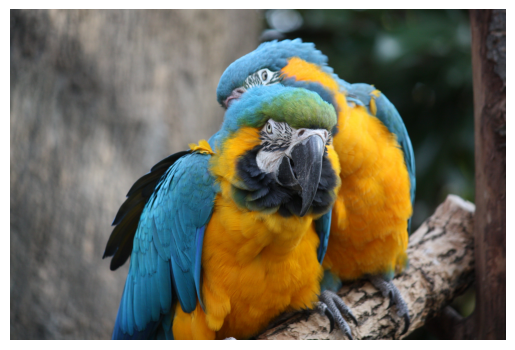

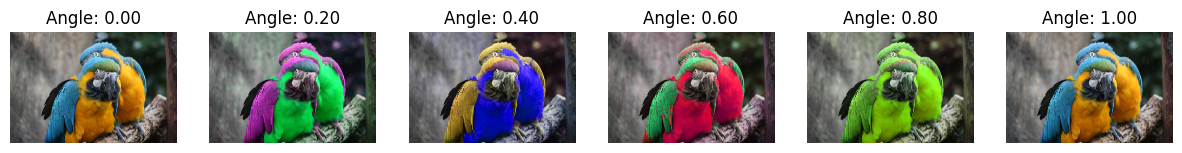

In [50]:
# Load the image
image_bgr = cv2.imread('BlueAndYellowMacaw_AraArarauna.jpg')

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


# Convert the image to HSV space
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

def rotate_hue(image, angle):
    # Extract the hue channel
    hue = image[:, :, 0]
    
    # Apply the hue rotation
    rotated_hue = (hue + 255*angle) % 255
    
    # Replace the hue channel with the rotated hue
    image_rotated = np.copy(image)
    image_rotated[:, :, 0] = rotated_hue
    
    return image_rotated

# List of angles for rotation
angles = [k / 5 for k in range(6)]

# Apply rotation and visualize the images
plt.figure(figsize=(15, 5))
for i, angle in enumerate(angles):
    # Rotate the hue channel
    rotated_image_hsv = rotate_hue(image_hsv, angle)
    
    # Convert back to RGB space
    rotated_image_rgb = cv2.cvtColor(rotated_image_hsv, cv2.COLOR_HSV2RGB)
    
    # Plot the image
    plt.subplot(1, 6, i + 1)
    plt.imshow(rotated_image_rgb)
    plt.title(f'Angle: {angle:.2f}')
    plt.axis('off')

plt.show()

# Exercise 1.4

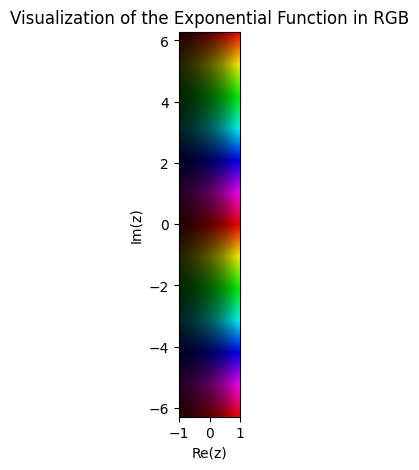

In [54]:
from skimage import color


x = np.linspace(-1, 1, 100)
y = np.linspace(-2 * np.pi, 2 * np.pi, 400)
X, Y = np.meshgrid(x, y)

Z = np.exp(X + 1j * Y)
R = np.abs(Z)
Theta = np.angle(Z)

hsv_image = np.zeros((Y.shape[0], X.shape[1], 3))

# hue depending on angle (make it positive to avoid defects)
hsv_image[..., 0] = (Theta + 2 * np.pi) / (2 * np.pi)

# full saturation
hsv_image[..., 1] = 1

# value ("colorful to black") depending on absolute value
hsv_image[..., 2] = R / R.max()

# convert from hsv to rgb format
rgb_image = color.hsv2rgb(hsv_image)

plt.figure(figsize=(10, 5))
plt.imshow(rgb_image, extent=[-1, 1, -2 * np.pi, 2 * np.pi])
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.title('Visualization of the Exponential Function in RGB')
plt.show()